In [5]:
# Print the filenames from the DataFrame
print(df_measurements['image_filename'])


0      enhanced_MMED-002_image_data_1_raw_image.jpg
1      enhanced_MMED-002_image_data_2_raw_image.jpg
2      enhanced_MMED-003_image_data_1_raw_image.jpg
3      enhanced_MMED-004_image_data_1_raw_image.jpg
4      enhanced_MMED-004_image_data_2_raw_image.jpg
                           ...                     
200    enhanced_MMED-103_image_data_2_raw_image.jpg
201    enhanced_MMED-104_image_data_1_raw_image.jpg
202    enhanced_MMED-104_image_data_2_raw_image.jpg
203    enhanced_MMED-105_image_data_1_raw_image.jpg
204    enhanced_MMED-105_image_data_2_raw_image.jpg
Name: image_filename, Length: 205, dtype: object


In [6]:
import os

# List files in the preprocessed_images directory
preprocessed_dir = 'documents/preprocessed_images'
files = os.listdir(preprocessed_dir)
print(files)


['preprocessed_image_87.png', 'preprocessed_image_59.png', 'preprocessed_image_113.png', 'preprocessed_image_62.png', 'preprocessed_image_57.png', 'preprocessed_image_69.png', 'preprocessed_image_88.png', 'preprocessed_image_173.png', 'preprocessed_image_161.png', 'preprocessed_image_132.png', 'preprocessed_image_39.png', 'preprocessed_image_33.png', 'preprocessed_image_111.png', 'preprocessed_image_97.png', 'preprocessed_image_10.png', 'preprocessed_image_188.png', 'preprocessed_image_138.png', 'preprocessed_image_169.png', 'preprocessed_image_65.png', 'preprocessed_image_162.png', 'preprocessed_image_135.png', 'preprocessed_image_108.png', 'preprocessed_image_163.png', 'preprocessed_image_126.png', 'preprocessed_image_24.png', 'preprocessed_image_76.png', 'preprocessed_image_177.png', 'preprocessed_image_49.png', 'preprocessed_image_155.png', 'preprocessed_image_41.png', 'preprocessed_image_74.png', 'preprocessed_image_149.png', 'preprocessed_image_34.png', 'preprocessed_image_3.png'

In [9]:
import pandas as pd
import numpy as np
from PIL import Image
import os

# Load the CSV containing image file names and ONSD measurements
df_measurements = pd.read_csv('./documents/preprocessed_images/image_measurements.csv')

# Load and preprocess images
def load_and_preprocess_image(image_path):
    with Image.open(image_path) as img:
        img = img.resize((128, 128))  # Ensure all images are the same size
        return np.array(img).flatten()  # Flatten the image data

base_dir = 'documents/preprocessed_images'



In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(image_data, onsd_measurements, test_size=0.2, random_state=42)


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicting on the test set
lr_predictions = lr_model.predict(X_test)

# Evaluating the model
lr_mse = mean_squared_error(y_test, lr_predictions)
print(f"Linear Regression MSE: {lr_mse}")


Linear Regression MSE: 0.33045365104964763


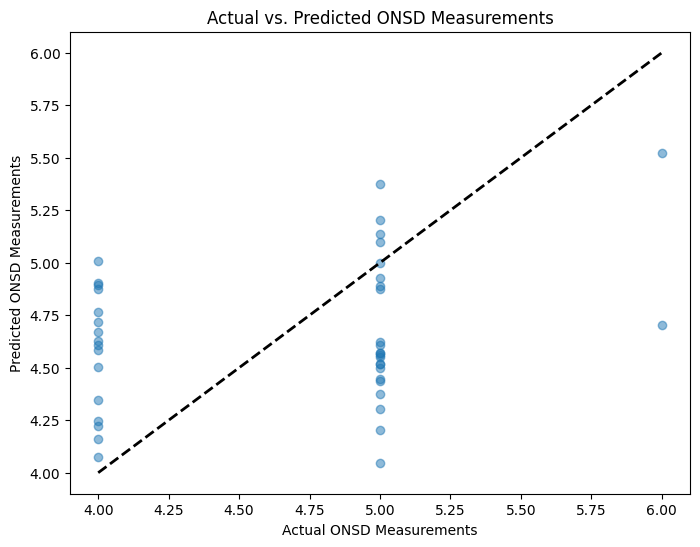

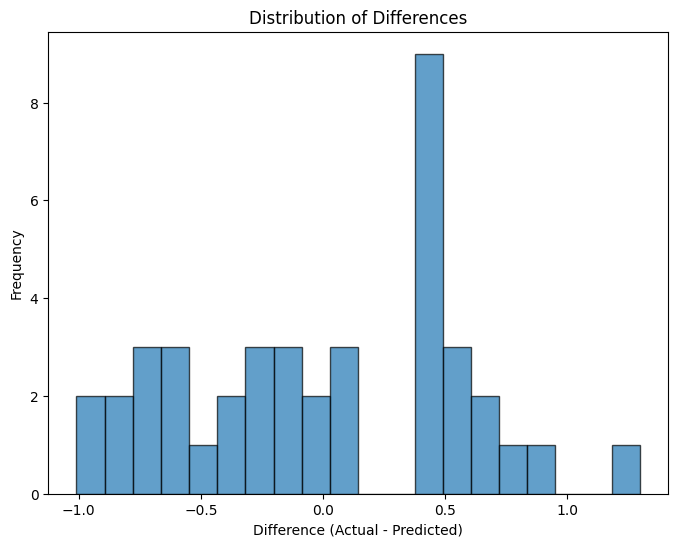

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # A diagonal line for reference
plt.xlabel('Actual ONSD Measurements')
plt.ylabel('Predicted ONSD Measurements')
plt.title('Actual vs. Predicted ONSD Measurements')
plt.show()

# Calculate the differences between the actual and predicted values
differences = y_test - lr_predictions

# Plotting the distribution of differences
plt.figure(figsize=(8, 6))
plt.hist(differences, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Difference (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Differences')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluating the model
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest MSE: {rf_mse}")


Random Forest MSE: 0.3461536585365854


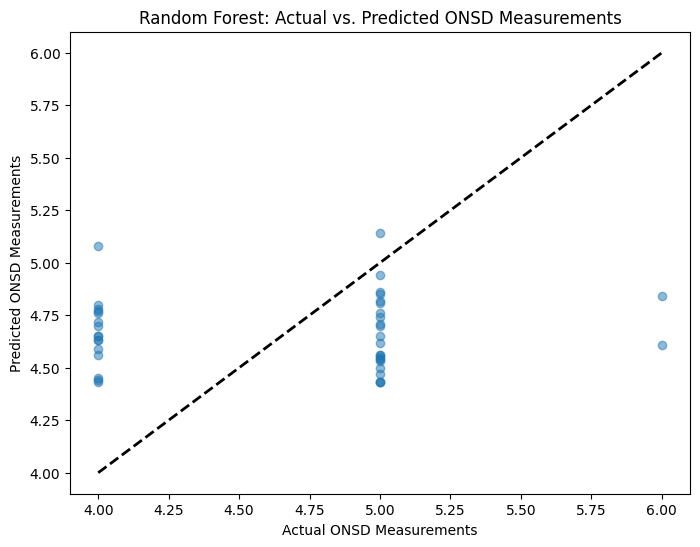

In [ ]:
# Scatter plot of actual vs. predicted values for Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Reference line
plt.xlabel('Actual ONSD Measurements')
plt.ylabel('Predicted ONSD Measurements')
plt.title('Random Forest: Actual vs. Predicted ONSD Measurements')
plt.show()


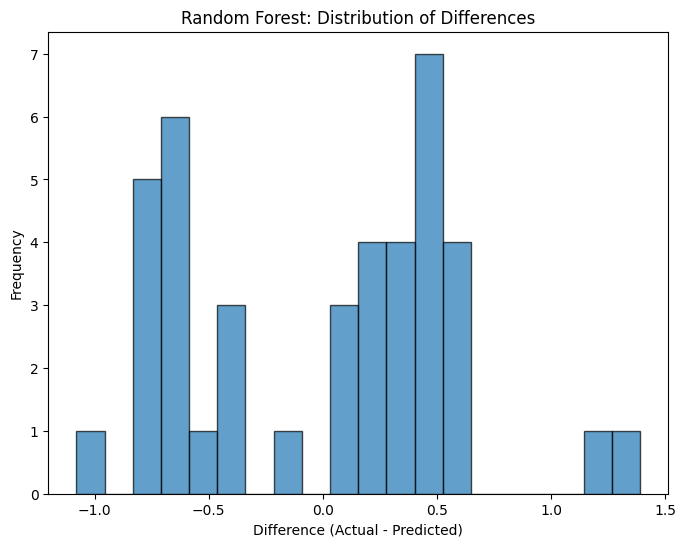

In [ ]:
# Calculate the differences (residuals) between the actual and predicted values
rf_differences = y_test - rf_predictions

# Plotting the distribution of differences for Random Forest
plt.figure(figsize=(8, 6))
plt.hist(rf_differences, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Difference (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Random Forest: Distribution of Differences')
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE and RMSE for Random Forest
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

print(f"Random Forest Mean Absolute Error (MAE): {rf_mae:.4f}")
print(f"Random Forest Root Mean Squared Error (RMSE): {rf_rmse:.4f}")


Random Forest Mean Absolute Error (MAE): 0.5202
Random Forest Root Mean Squared Error (RMSE): 0.5883


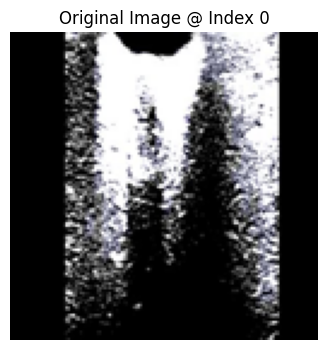

Actual ONSD Measurement: 6
Linear Regression Predicted ONSD: 5.5217904366817105
Random Forest Predicted ONSD: 4.84


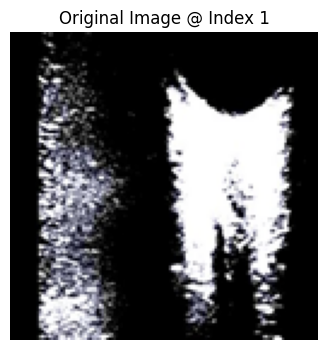

Actual ONSD Measurement: 4
Linear Regression Predicted ONSD: 4.628939369274847
Random Forest Predicted ONSD: 4.78


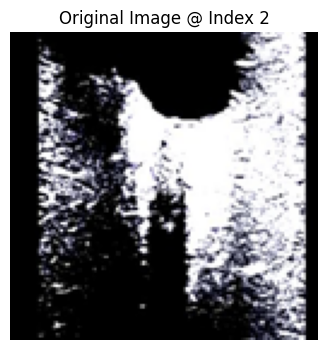

Actual ONSD Measurement: 4
Linear Regression Predicted ONSD: 4.607700233843079
Random Forest Predicted ONSD: 4.63


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display an image and its ONSD measurements
def display_image_with_measurements(index):
    # Assuming the images were resized to 128x128 for the model
    # Reshape them back to their original dimensions if they were flattened or resized differently
    image = X_test[index].reshape(128, 128, 3) # Adjust this reshape based on your original image size and channels

    actual_measurement = y_test[index]
    lr_predicted_measurement = lr_predictions[index]
    rf_predicted_measurement = rf_predictions[index]

    plt.figure(figsize=(6, 4))
    plt.imshow(image)
    plt.title(f"Original Image @ Index {index}")
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()

    print(f"Actual ONSD Measurement: {actual_measurement}")
    print(f"Linear Regression Predicted ONSD: {lr_predicted_measurement}")
    print(f"Random Forest Predicted ONSD: {rf_predicted_measurement}")

# Display images with indexes 0, 1, 2 as examples
for index in [0, 1, 2]:
    display_image_with_measurements(index)


OK Lets try XGBoost 


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create an XGBoost regression model
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

# Fit the model with your training data
xgb_model.fit(X_train, y_train)

# Predict ONSD measurements on the test set
xgb_predictions = xgb_model.predict(X_test)

# Calculate evaluation metrics
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)

print(f"XGBoost Mean Squared Error (MSE): {xgb_mse:.4f}")
print(f"XGBoost Mean Absolute Error (MAE): {xgb_mae:.4f}")
print(f"XGBoost Root Mean Squared Error (RMSE): {xgb_rmse:.4f}")


XGBoost Mean Squared Error (MSE): 0.3163
XGBoost Mean Absolute Error (MAE): 0.5100
XGBoost Root Mean Squared Error (RMSE): 0.5624


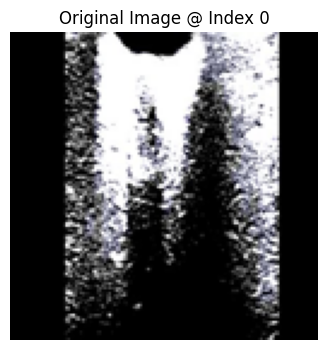

Actual ONSD Measurement: 6
XGBoost Predicted ONSD: 4.751131534576416


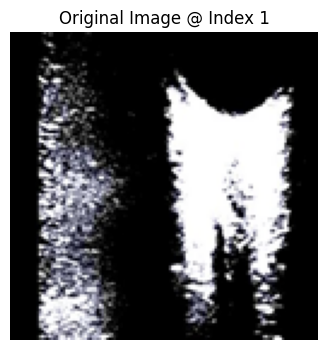

Actual ONSD Measurement: 4
XGBoost Predicted ONSD: 4.6548380851745605


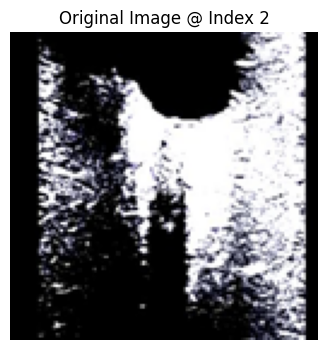

Actual ONSD Measurement: 4
XGBoost Predicted ONSD: 4.676365375518799


In [ ]:
# Modify the display function to include XGBoost predictions
def display_image_with_xgb_measurements(index):
    image = X_test[index].reshape(128, 128, 3) # Adjust this reshape based on your original image size and channels
    
    actual_measurement = y_test[index]
    xgb_predicted_measurement = xgb_predictions[index]
    
    plt.figure(figsize=(6, 4))
    plt.imshow(image)
    plt.title(f"Original Image @ Index {index}")
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()
    
    print(f"Actual ONSD Measurement: {actual_measurement}")
    print(f"XGBoost Predicted ONSD: {xgb_predicted_measurement}")

# Display images with XGBoost predictions for indexes 0, 1, 2 as examples
for index in [0, 1, 2]:
    display_image_with_xgb_measurements(index)
